<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/BT1_ANN_Nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

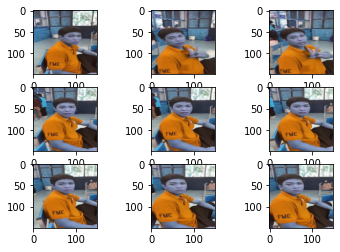

In [109]:
#import thư viện

from sklearn.utils import shuffle

import math as m

import cv2
import pickle
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from sklearn.preprocessing import scale
from keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten
from tensorflow.keras.utils import to_categorical 

with open('anhchandung.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
x_pre = x_train
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()


In [110]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [111]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_train = x_train.astype('float32')
y_train = np_utils.to_categorical(y_train, 2)
x_train, y_train = shuffle(x_train, y_train)
x_train /= 255
y_train.shape

(90, 2)

In [112]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (67500,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 30, validation_split = 0.2)

Epoch 1/30
3/3 [==============================] - 1s 128ms/step - loss: 0.8708 - accuracy: 0.5694 - val_loss: 2.7345 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 37ms/step - loss: 1.4661 - accuracy: 0.6250 - val_loss: 0.4790 - val_accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 0s 33ms/step - loss: 0.2770 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 0s 35ms/step - loss: 0.0505 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 0s 37ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 0s 33ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 0s 36ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 8/30
3/3 [==========

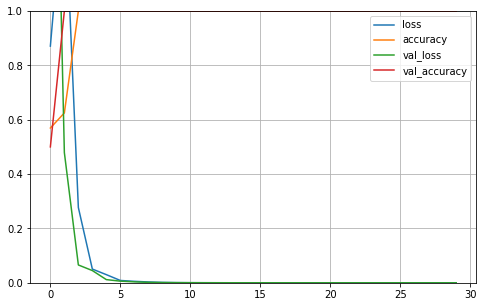

In [113]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

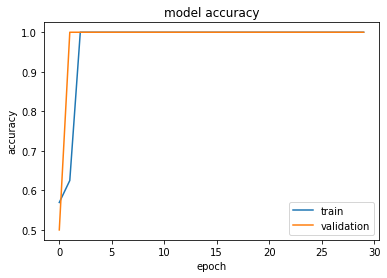

In [114]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

(150, 150, 3)
[0]


'Đây không phải Chiến'

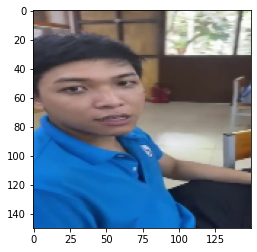

In [126]:
test = 15
plt.imshow(cv2.cvtColor(x_pre[test], cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1,-1)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây không phải Chiến', 'Đây là Chiến']
Label[pred[0]]

(150, 150, 3)
[1]


'Đây là Chiến'

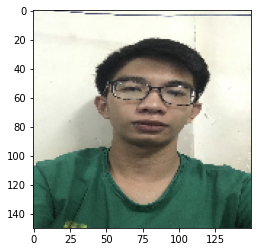

In [125]:
test = 85
plt.imshow(cv2.cvtColor(x_pre[test], cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1,-1)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây không phải Chiến', 'Đây là Chiến']
Label[pred[0]]

In [151]:
model.save('nhandienkhuonmat.h5')